In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

matplotlib.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

O conjunto de dados está disponível publicamente no Kaggle através do link: {https://www.kaggle.com/code/lauriandwu/machine-learning-heart-disease-framingham/data}. Os dados são resultados de um estudo cardiovascular realizado em moradores da cidade de Framingham, Massachusetts. O objetivo do estudo é entender quais fatores  estão associados ao paciente ter risco de desenvolver doença coronariana (DAC) nos próximos 10 anos. O conjunto de dados fornece as informações dos pacientes compostas por mais de 4.000 registros e 15 atributos. Variáveis Cada atributo é um potencial  fator de risco. Existem fatores de risco demográficos, comportamentais e médicos.


## Atributos:

### Demográficos:
**male:** Masculino ou Feminino (M ou F)

**age:** Idade (numérico)

**education:** Não possui descrição clara e será desconsiderada


## Comportamental:
**Fumante:** Se o paciente é ou não fumante

**Cigs Per Day:** Número de cigarros que o paciente fuma por dia.

## Information on medical history:
**BP Meds:** Se o paciente faz uso de medicamento para controle de pressão arterial

**Prevalent Stroke:** Se o paciente já teve ou não um acidente vascular cerebral

**Prevalent Hyp:** Se o paciente é ou não hipertenso

**Diabetes:** se o paciente era ou não diabético


## Condições médicas:
**Tot Chol:** Nível de colesterol Total

**Sys BP:** Pressão sanguinea sistólica
**Dia BP:** Pressão sanguinea diastólica

**BMI:** Índice de massa corporal

**Heart Rate:** Frequência Cardíaca

**Glucose:** Nível de Glicose

## Informação alvo:
**TenYearCHD:** Risco de doença coronária cardíaca nos próximos 10 anos.

# Objetivo:

Explorar o banco de dados, identificando padrões resumindo informações de interesse.

In [4]:
#Leitura do banco de dados utilizando a biblioteca pandas
#url= 'https://drive.google.com/file/d/1qneSOa5mv3_1jvg2CF4XxqKnwu9sCSi9/view?usp=sharing'
#url='https://drive.google.com/uc?id=' + url.split('/')[-2]
heart = pd.read_csv("/content/framingham_heart_disease.csv")

#Observando o tamanho do banco
print(f'O argumento .shape retorna o tamanho de linhas e colunas do banco')
print(f'O banco heart possui {heart.shape[0]} linhas e {heart.shape[1]} colunas')

O argumento .shape retorna o tamanho de linhas e colunas do banco
O banco heart possui 4238 linhas e 16 colunas


In [5]:
#Observando a estrutura do banco
print(f'O argumento .info() retorna informações gerais sobre cada doluna do banco')
print(' ')
heart.info()

O argumento .info() retorna informações gerais sobre cada doluna do banco
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null

In [6]:
#Sugestão de tratamentos iniciais

heart['male'] = np.where(heart['male'] == 1, 'M','F') # Troca os valores 1,0 por M, F
heart['currentSmoker'] = np.where(heart['currentSmoker'] == 1, 'Sim','Não') # Troca os valores 1,0 por Sim, Não
heart['BPMeds'] = np.where(heart['BPMeds'] == 1, 'Sim','Não') # Troca os valores 1,0 por Sim, Não
heart['prevalentStroke'] = np.where(heart['prevalentStroke'] == 1, 'Sim','Não') # Troca os valores 1,0 por Sim, Não
heart['prevalentHyp'] = np.where(heart['prevalentHyp'] == 1, 'Sim','Não') # Troca os valores 1,0 por Sim, Não
heart['diabetes'] = np.where(heart['diabetes'] == 1, 'Sim','Não') # Troca os valores 1,0 por Sim, Não
heart['TenYearCHD'] = np.where(heart['TenYearCHD'] == 1, 'Sim','Não') # Troca os valores 1,0 por Sim, Não
heart.male = heart.male.astype('category') #Troca o tipo da variável de objeto para categórica
heart.currentSmoker = heart.currentSmoker.astype('category') #Troca o tipo da variável de objeto para categórica
heart.BPMeds = heart.BPMeds.astype('category') #Troca o tipo da variável de objeto para categórica
heart.prevalentStroke = heart.prevalentStroke.astype('category') #Troca o tipo da variável de objeto para categórica
heart.prevalentHyp = heart.prevalentHyp.astype('category') #Troca o tipo da variável de objeto para categórica
heart.diabetes = heart.diabetes.astype('category') #Troca o tipo da variável de objeto para categórica
heart.male = heart.male.astype('category') #Troca o tipo da variável de objeto para categórica
heart.TenYearCHD = heart.TenYearCHD.astype('category') #Troca o tipo da variável de objeto para categórica
heart = heart.drop(labels=['education'], axis=1) #Dropa a coluna com informação de educação
print('Para facilitar a construção de gráficos e visualizações, as informações binárias foram trocadas para as strings respectivas')
print('Algumas funções do python tem dificuldades em processar objetos, por isso elas foram atribuidas como categóricas')
print('E após esse tratamento inicial, o banco fica assim:')
heart.head(10)

Para facilitar a construção de gráficos e visualizações, as informações binárias foram trocadas para as strings respectivas
Algumas funções do python tem dificuldades em processar objetos, por isso elas foram atribuidas como categóricas
E após esse tratamento inicial, o banco fica assim:


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,Não,0.0,Não,Não,Não,Não,195.0,106.0,70.0,26.97,80.0,77.0,Não
1,F,46,Não,0.0,Não,Não,Não,Não,250.0,121.0,81.0,28.73,95.0,76.0,Não
2,M,48,Sim,20.0,Não,Não,Não,Não,245.0,127.5,80.0,25.34,75.0,70.0,Não
3,F,61,Sim,30.0,Não,Não,Sim,Não,225.0,150.0,95.0,28.58,65.0,103.0,Sim
4,F,46,Sim,23.0,Não,Não,Não,Não,285.0,130.0,84.0,23.10,85.0,85.0,Não
5,F,43,Não,0.0,Não,Não,Sim,Não,228.0,180.0,110.0,30.30,77.0,99.0,Não
6,F,63,Não,0.0,Não,Não,Não,Não,205.0,138.0,71.0,33.11,60.0,85.0,Sim
7,F,45,Sim,20.0,Não,Não,Não,Não,313.0,100.0,71.0,21.68,79.0,78.0,Não
8,M,52,Não,0.0,Não,Não,Sim,Não,260.0,141.5,89.0,26.36,76.0,79.0,Não
9,M,43,Sim,30.0,Não,Não,Sim,Não,225.0,162.0,107.0,23.61,93.0,88.0,Não


### Sobre o banco:

Quais variáveis são qualitativas e quais variáveis são quantitativas?

    As variaveis qualitativas são (male,CurrentSmoker,BPMeds,prevalentStroke,prevlentHyp, diabetes, tenYearCHD)

    As variaveis quantitativas são(Age, cigsPerDay,Totchol,sysBP,diaBP,BMI,HeartRate,glucose)

Existem variáveis qualitativas nominais?
    
    Male, CurrentSmoker,BPMeds,prevalentStroke,prevlentHyp, diabetes, tenYearCHD

Existem variáveis qualitativas ordinais?
    
    não

Existem variáveis quantitativas discretas?
    
    cigsPerDay
Existem variáveis quantitativas continúas?
    
    Age, Totchol,sysBP,diaBP,BMI,HeartRate,glucose

In [7]:
# Use a função .describe() para obter as estatísticas descritivas sumárias do conjunto de dados

heart.describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4209.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,11.920094,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


Você também pode utilizar o parametro *percentiles* na função describe para obter outros percentis alem dos que são mostrados, como por exemplo:

In [8]:
# Use a função .describe() para obter as estatísticas descritivas sumárias do conjunto de dados

heart.describe(percentiles = [0,0.001, 0.25,0.5,0.75,0.99, 1])

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4209.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,11.920094,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
0%,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
0.1%,33.000000,0.000000,126.561000,90.000000,52.237000,16.594360,47.236000,44.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
99%,67.000000,43.000000,354.130000,200.000000,118.000000,38.956400,110.000000,175.040000


Observar os percentis de $1\%$ e $99\%$ ajudam a identificar possiveis dados discrepantes no conjunto de dados.

Dentre as variáveis e os percentis observados, alguma das informações parece não estar correta?

Observe que a função *.describe()* só retornou informações sobre os dados numéricos

Você também pode utilizar o parametro *include=['category']* na função describe para obter informações das variáveis categóricas

In [9]:
# Use a função .describe() para obter as estatísticas descritivas sumárias das variáveis categóricas

#Digite aqui
heart.describe(include = ['category'])

,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
count,4238,4238,4238,4238,4238,4238,4238
unique,2,2,2,2,2,2,2
top,F,Não,Não,Não,Não,Não,Não
freq,2419,2144,4114,4213,2922,4129,3594


Após observar as variáveis categóricas que conclusões podemos observar?

    A maior base dos dados são mulheres que não fumam, e que não possuem nenhuma condição medica das listadas 

O conjunto de dados é um conjunto de dados balanceado?

    não temos pouca incidencia positivas no historico medico dos entrevistados

Interprete cada caso.

    Male: a maioria dos entrevistados são mulhers mas pode se considerar uma variavel balanceada
    currentSmoker: a maioria dos entrevistados não fumam, mas a diferença e pouca e uma variavel balanceada.
    as variaveis de historico medico, tem sua maioria como não ocorrencias e não são variaveis balanceadas tendo poucos casos positivos. 

    

# Visualização de dados

 **Obs:** Esse módulo do curso ainda não trata sobre Dataviz e Data storytelling. Aqui veremos apenas alguns gráficos simples com o objetivo de **Explorar** o conjunto de dados

## Análise Univariada

Vamos olhar para algumas variáveis de forma independente

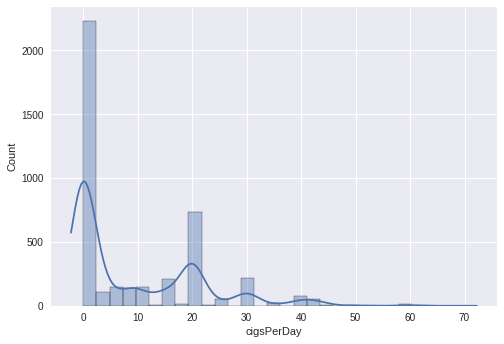

In [10]:
#Como o uso da biblioteca Seaborn podemos plotar uns gráficos "mais elegantes que apenas o plot"

#Aqui a função plota um histograma,
#o argumento kde (pode ser removido) atribui ao histograma uma linha que desenha a densidade dessa distribuição
sns.histplot(heart.cigsPerDay, alpha=0.4, kde=True, kde_kws={"cut": 1})

O que podemos concluir observando o número de de cigarros que os pacientes fumam podia?
    
    existe um numero alto de 0 cigarros fumados por dia pois os não fumantes estão inclusos.
    Podemos dizer que pouco mais de 1000 pessoas disseram fumar entre 15 a 20 
    cigarros por dia. 
    E pouco menos de 500 pesoas fumam 30 ou mais cigarros por dia. 

Observe que nenhuma filtragem foi feita, logo o histograma retorna todas as informações do banco, incluindo o de pessoas que não fumam cigarro, ou seja que fumam 0 cigarros por dia.

Uma forma de contornar esse olhar é filtrar a informação que queremos: Primeiro indique qual o filtro deve ser atribuido no banco e depois selecione a coluna que deseja plotar.

O código pode parecer confuso, mas evita criar bancos de dados paralelos e pesar a memória do computador.

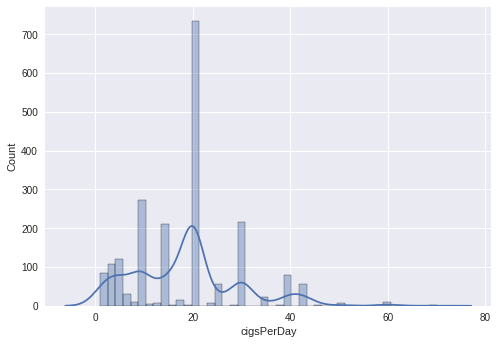

In [11]:
sns.histplot(heart.query('currentSmoker == "Sim"').cigsPerDay,
             alpha=0.4,
             kde=True,
             kde_kws={"cut": 3})

Observe como a informação muda. Agora de fato entre os fumantes qual conclusão podemos obter observando o número de cigarros fumados por dia?

    Agora e possivel dizer que entre 600-700 pessoas fumam menos de 10 cigarros por dia 

### Sua vez:
**Plote outros histogramas e observe como as variáveis numéricas se distribuem e quais conclusões podem ser tiradas.**
_______________________________________________________________________________________________


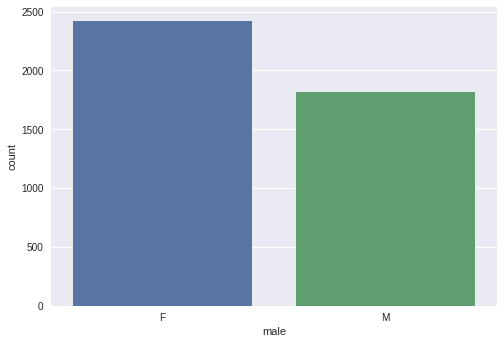

In [12]:
#Aqui a função plota um barplot

sns.countplot(heart.male)

O que podemos concluir observando o volume de pessoas  de cada sexo?

Existe algum grupo dominante?

    Sim os entrevistados sao em sua maioria mulheres

### Sua vez:
**Plote outros gráficos de barras e observe como as variáveis categóricas se distribuem e quais conclusões podem ser tiradas.**

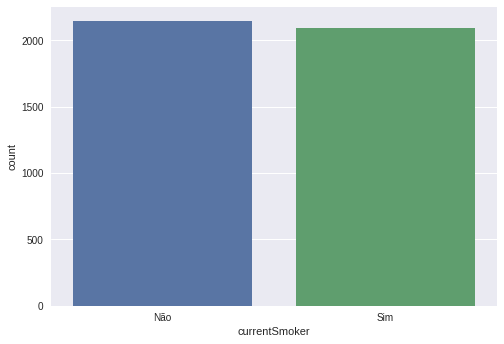

In [13]:
sns.countplot(heart.currentSmoker)


a diferença em currentSmoker e muito pouca como tinha visto anteriormente 

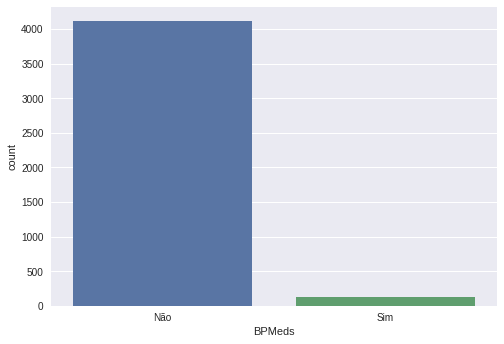

In [14]:
sns.countplot(heart.BPMeds)

quase não existe incidência de pacientes que tomam medicação, tornando uma variavel desbalanceada 

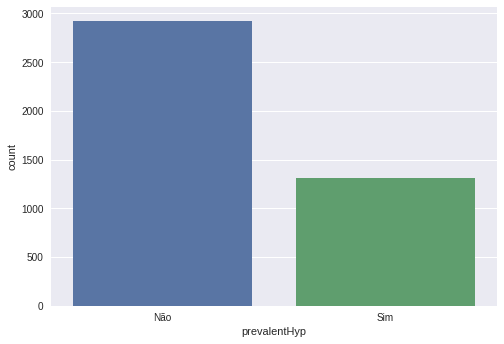

In [15]:
sns.countplot(heart.prevalentHyp)

As variaveis de condições medicas estão todas desbanlaceadas com pouca incidencias de casos positivos. 

## Análise Multivariada

**Vamos olhar para algumas variáveis cruzando informações entre elas**

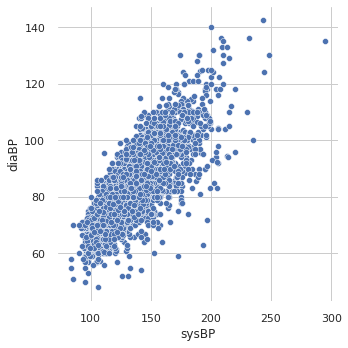

In [16]:
#Vamos fazer uma função mais elaborada e plotar um Scarplot entre as variáveis de pressão sistólica e diastólica

import seaborn as sns
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=heart,
    x="sysBP", y="diaBP")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)


**O gráfico plotado mostra a disperção quando olhamos o comportamento da pressão diastólica e a pressão sistólica medida, configurando uma análise bivariada. Olhando o comportamento dos pontos é possivel identificar um padrão?**

    quanto maior a pressão sistólica tbm a aumento na pressão diastólica


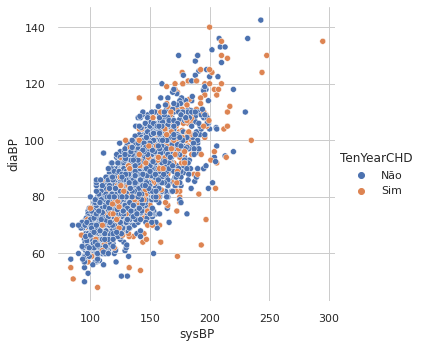

In [17]:
# Refinando a informação anterior
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=heart,
    x="sysBP", y="diaBP",
    hue="TenYearCHD",
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

**Com o argumento *hue* podemos agrupar a informação em categorias e observar o mesmo comportamento, agora distinguindo por cores pessoas propensas a ter doença coronária e pessoas não propensas.**

**Agora com uma análise multivariada,  é possivel concluir algo entre a relação de as informações de pressão diastólica, pressão sistólica e risco de doença coronárioa?**

    Aparentemente a pressão sistolica e diastolica tem pouca ou nenhuma influencia no risco de doença coronaria 

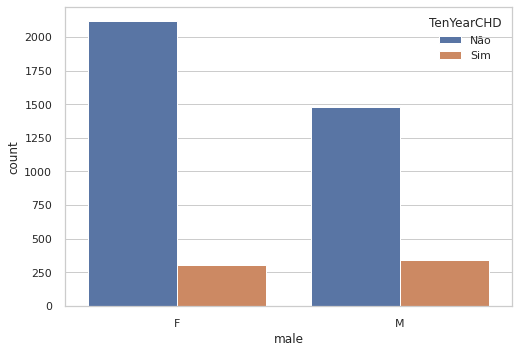

In [18]:
#Aqui a função plota um barplot da variável Sexo agrupada pelo risco de doença coronária

sns.countplot(heart.male, hue = heart.TenYearCHD)

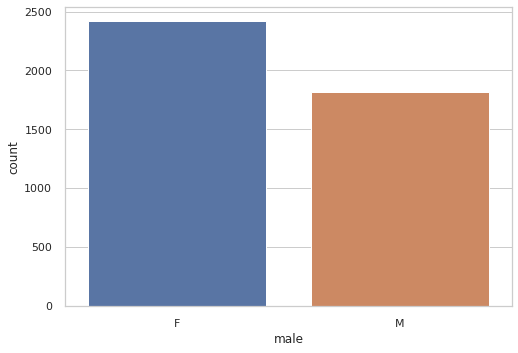

In [21]:
sns.countplot(heart.male)

**Da mesma forma que fizemos com o *scarplot* também podemos agrupar informações categóricas no countplot (ou barplot) e comparar as distribuições.**

**Compare o *countplot* de sexo sem agrupamento e o com agrupamento por risco de doença e interprte eles. Qual a diferença de olhar unicamente pra uma variavel e cruzar duas informações?**

    Ao cruzar as informações percebemos que mesmo os homens não sendo o sexo dominante da entrevista eles possuem maior chance de adquerir doença coronaria

### Sua vez:
**Plote outros gráficos de disperção cruzando variáveis numéricas, escolha agrupar com variáveis categóricas e observe quais conclusões podem ser tiradas.**
_______________________________________________________________________________________________________________________________


**Uma outra forma, agora de cruzar informações continuas e categóricas é olhar para a disperção de variáveis continuas e agrupa-lás de acordo com categorias**

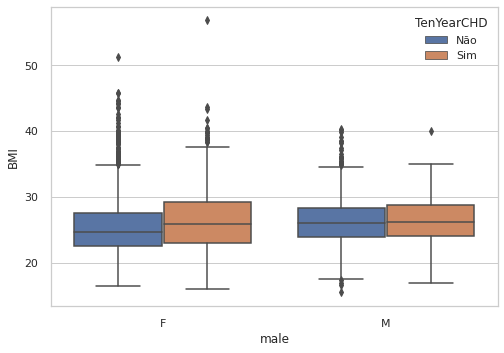

In [20]:
#Plot da dispersão de distribuição de massa corporal agrupada por sexo

sns.boxplot(data=heart, x="male", y="BMI", hue="TenYearCHD",)

**O que podemos observar comparando a distribuição de massa corporal em pessoas de diferentes sexos em cada caso?**

    mulheres que apresentão um indice de massa corporal maior apresentão uma chance um pouco maior de se obter a doença.  
    ja nos homemns o BMI não parece ter tanta diferença.

### Sua vez:
**Plote outros gráficos de distribuição cruzando variáveis numéricas e categóricas, escolha agrupar com variáveis de interesse e observe quais conclusões podem ser tiradas.**
_______________________________________________________________________________________________________________________________
